Missing values in dataset:
Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

First few rows of the dataset:
  Student ID  Study Hours per Week  Attendance Rate  Previous Grades  \
0     S00001                  12.5              NaN             75.0   
1     S00002                   9.3             95.3             60.6   
2     S00003                  13.2              NaN             64.0   
3     S00004                  17.6             76.8             62.4   
4     S00005                   8.8             89.3             72.7   

  Participation in Extracurricular Activities Parent Education Level Passed  
0                                         Yes        

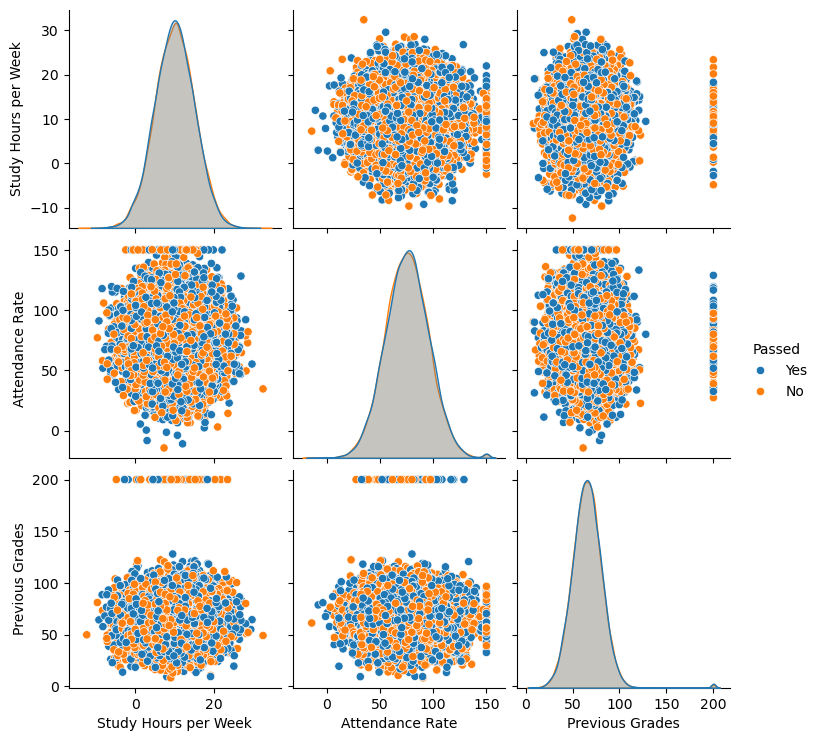

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Load the dataset
df = pd.read_csv('student_performance_prediction.csv')

# Step 3: Data Exploration
# Check for missing values
print("Missing values in dataset:")
print(df.isnull().sum())

# Check the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Visualize the data
sns.pairplot(df, hue="Passed")  # Assuming "Passed" is the target variable
plt.show()

# Step 4: Model Training
# Split the data into features and target
X = df[['Study Hours per Week', 'Attendance Rate']]  # Adjust columns as per your dataset
y = df['Passed']  # Assuming 'Passed' column is the target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Step 5: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot(cmap="Blues")
plt.show()

# Step 6: Insights
# Key predictors of student performance
coef = model.coef_[0]
features = X.columns
print("\nFeature Importance (coefficients):")
for feature, coef_value in zip(features, coef):
    print(f"{feature}: {coef_value:.2f}")



In [10]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Step 2: Load the dataset
df = pd.read_csv('Dataset-SA.csv')  # Replace with the actual path to your file

# Step 3: Data Exploration
print(df.head())  # Check the first few rows of the dataset
print(df.isnull().sum())  # Check for missing values
print(df['Sentiment'].value_counts())  # Check distribution of sentiments

# Step 4: Text Preprocessing
# Initialize stopwords, lemmatizer, and punctuation
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
punctuation = string.punctuation

# Preprocessing function
def preprocess_text(text):
    # Check if the text is a string, otherwise return an empty string
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stopwords and punctuation, and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word not in punctuation]
    
    return " ".join(words)


# Apply preprocessing to both Review and Summary columns
df['Cleaned_Review'] = df['Review'].apply(preprocess_text)
df['Cleaned_Summary'] = df['Summary'].apply(preprocess_text)

# Step 5: Text Vectorization (TF-IDF)
# Combine Cleaned_Review and Cleaned_Summary to represent the text for sentiment classification
df['Text'] = df['Cleaned_Review'] + " " + df['Cleaned_Summary']

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit the number of features to avoid high dimensionality

# Fit and transform the combined text (Review + Summary) into TF-IDF features
X = tfidf_vectorizer.fit_transform(df['Text'])

# Step 6: Prepare the target variable
# Convert sentiment labels to numeric (1: Positive, 0: Neutral, -1: Negative)
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else (0 if x == 'Neutral' else -1))
y = df['Sentiment_Label']

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
model.fit(X_train, y_train)

# Step 9: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate using Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
cm_display.plot(cmap="Blues")
plt.show()

# Step 11: Insights
# Example of Correct and Incorrect Predictions
correct_predictions = df.iloc[y_test.index][(y_pred == y_test)]
incorrect_predictions = df.iloc[y_test.index][(y_pred != y_test)]

print("\nExample of Correct Predictions:")
print(correct_predictions[['Product_name', 'Review', 'Sentiment']].head())

print("\nExample of Incorrect Predictions:")
print(incorrect_predictions[['Product_name', 'Review', 'Sentiment']].head())

# Top features contributing to model decisions
top_features = np.argsort(model.coef_[0])[-10:]
top_feature_names = np.array(tfidf_vectorizer.get_feature_names_out())[top_features]
top_feature_values = model.coef_[0][top_features]

print("\nTop 10 Features for Positive Sentiment:")
for feature, value in zip(top_feature_names, top_feature_values):
    print(f"{feature}: {value:.4f}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral  
product_name         0
pro

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: -1